In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import svm

from sklearn.tree import DecisionTreeRegressor
pd.set_option('display.max_rows', 500)

In [2]:
datos = pd.read_csv("health.csv")



In [3]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   location_key                          3503 non-null   object 
 1   life_expectancy                       3499 non-null   float64
 2   smoking_prevalence                    146 non-null    float64
 3   diabetes_prevalence                   209 non-null    float64
 4   infant_mortality_rate                 193 non-null    float64
 5   adult_male_mortality_rate             189 non-null    float64
 6   adult_female_mortality_rate           189 non-null    float64
 7   pollution_mortality_rate              183 non-null    float64
 8   comorbidity_mortality_rate            183 non-null    float64
 9   hospital_beds_per_1000                25 non-null     float64
 10  nurses_per_1000                       180 non-null    float64
 11  physicians_per_10

In [4]:
data = datos.dropna(subset = ["diabetes_prevalence"])
data = data.drop('hospital_beds_per_1000', axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 3503
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   location_key                          208 non-null    object 
 1   life_expectancy                       204 non-null    float64
 2   smoking_prevalence                    146 non-null    float64
 3   diabetes_prevalence                   209 non-null    float64
 4   infant_mortality_rate                 193 non-null    float64
 5   adult_male_mortality_rate             189 non-null    float64
 6   adult_female_mortality_rate           189 non-null    float64
 7   pollution_mortality_rate              183 non-null    float64
 8   comorbidity_mortality_rate            183 non-null    float64
 9   nurses_per_1000                       180 non-null    float64
 10  physicians_per_1000                   164 non-null    float64
 11  health_expenditure_usd 

In [6]:
data.describe()

,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
count,204.000000,146.000000,209.000000,193.000000,189.000000,189.000000,183.000000,183.000000,180.000000,164.000000,186.000000,186.000000
mean,72.787477,21.632877,8.360287,21.384974,185.241931,122.430323,92.212568,18.878142,4.393377,1.918615,1081.069390,228.803268
std,7.564083,9.724786,4.733473,19.433415,92.392926,81.752000,71.934490,5.603469,4.128114,1.652579,1781.597135,341.817738
min,52.805000,2.000000,1.000000,1.400000,41.498000,24.487000,7.000000,7.800000,0.073700,0.014000,19.431646,0.192364
25%,67.651250,14.000000,5.400000,6.100000,110.630000,61.842000,33.750000,14.850000,1.305425,0.414075,82.356327,27.560606
50%,74.097000,21.800000,6.900000,14.000000,177.539000,95.579000,68.600000,18.800000,3.067050,1.576550,335.949448,92.757919
75%,78.301762,27.975000,10.700000,32.700000,237.554000,174.970000,147.000000,22.900000,6.319825,2.985425,1110.915161,259.474007
max,85.417070,47.000000,30.500000,84.500000,545.675000,419.363000,324.100000,30.600000,19.461400,8.421800,10246.138672,2882.037109


In [7]:
data[data["adult_female_mortality_rate"] > 90].count()

location_key                            101
life_expectancy                         102
smoking_prevalence                       65
diabetes_prevalence                     102
infant_mortality_rate                   102
adult_male_mortality_rate               102
adult_female_mortality_rate             102
pollution_mortality_rate                101
comorbidity_mortality_rate              101
nurses_per_1000                          93
physicians_per_1000                      80
health_expenditure_usd                   98
out_of_pocket_health_expenditure_usd     98
dtype: int64

In [8]:
data.head(209)

,location_key,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
0,AD,NaN,33.5,7.7,2.7,NaN,NaN,NaN,NaN,4.0128,3.3333,4040.786621,1688.121460
1,AE,77.814000,28.9,16.3,6.5,69.555,44.863,54.7,16.8,5.7271,2.5278,1357.017456,256.034485
2,AF,64.486000,NaN,9.2,47.9,237.554,192.532,211.1,29.8,0.1755,0.2782,67.122650,50.665913
3,AG,76.885000,NaN,13.1,5.0,126.917,83.136,29.9,22.6,4.5171,2.9560,673.859680,235.749039
4,AL,78.900000,28.7,9.0,7.8,93.315,49.486,68.0,17.0,3.6495,1.2164,NaN,NaN
5,AM,74.945000,24.1,6.1,11.0,173.428,65.595,54.8,22.3,6.1070,4.4023,407.635864,343.832977
6,AO,60.782000,NaN,4.5,51.6,327.044,220.291,118.5,16.5,0.4075,0.2146,114.459641,39.054794
7,AR,76.520000,21.8,5.9,8.8,147.086,79.483,26.6,15.8,2.5996,3.9901,1324.603516,198.935944
8,AT,81.800000,29.6,6.6,2.9,79.032,41.779,15.3,11.4,7.0899,5.1697,4939.875488,948.617432
18,AU,82.748780,14.7,5.6,3.1,75.835,44.673,8.4,9.1,12.5508,3.6778,5331.817871,967.837036


In [9]:
data.fillna(data.median(numeric_only = True), inplace = True)
#data.head(209)

In [10]:
paises = data["location_key"]
#print(paises)

In [11]:
columna =  data["life_expectancy"]
data = data.drop("life_expectancy", axis = 1)
data = data.drop("smoking_prevalence", axis = 1)
data = data.drop("location_key", axis = 1)

data = data.drop("nurses_per_1000", axis = 1)
data = data.drop("physicians_per_1000", axis = 1)

data["life_expectancy"] = columna


In [12]:
#data.head(209)

In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 3503
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   diabetes_prevalence                   209 non-null    float64
 1   infant_mortality_rate                 209 non-null    float64
 2   adult_male_mortality_rate             209 non-null    float64
 3   adult_female_mortality_rate           209 non-null    float64
 4   pollution_mortality_rate              209 non-null    float64
 5   comorbidity_mortality_rate            209 non-null    float64
 6   health_expenditure_usd                209 non-null    float64
 7   out_of_pocket_health_expenditure_usd  209 non-null    float64
 8   life_expectancy                       209 non-null    float64
dtypes: float64(9)
memory usage: 16.3 KB


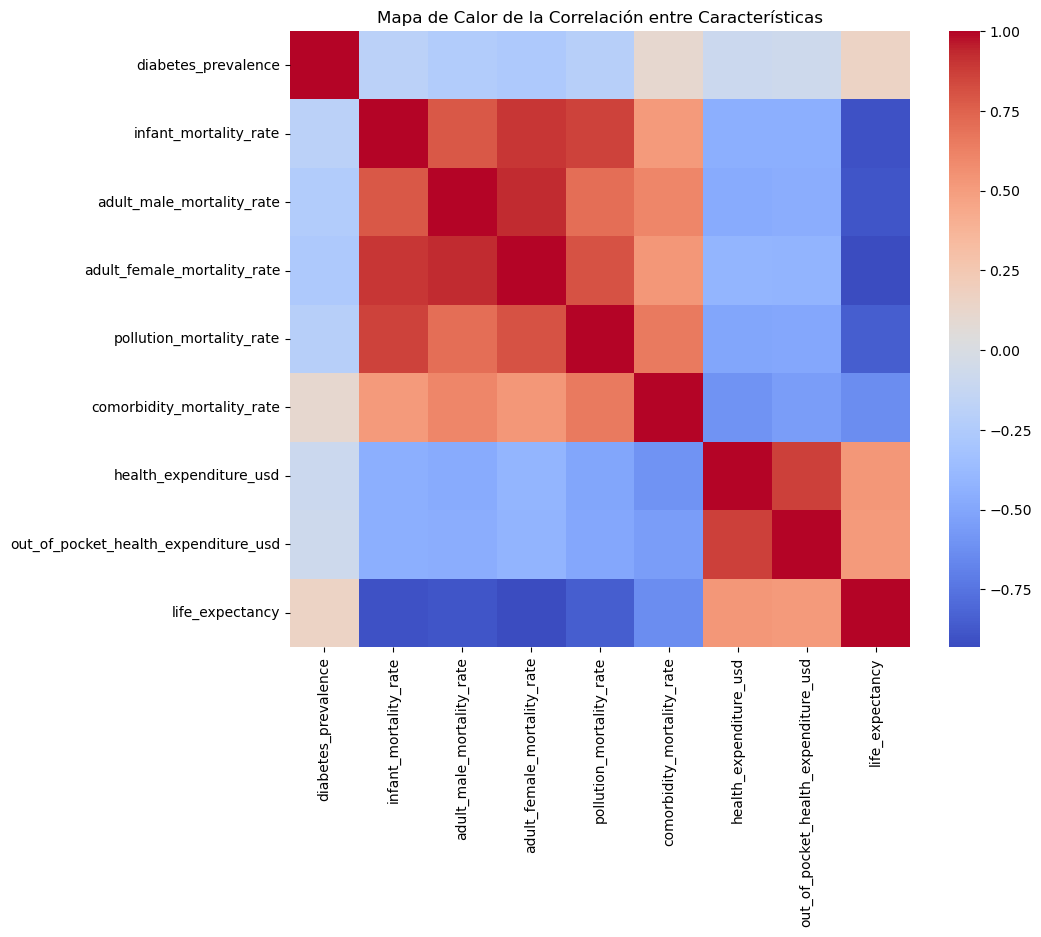

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:, :].corr(), cmap="coolwarm", annot=False, fmt=".2f", cbar=True)
plt.title("Mapa de Calor de la Correlación entre Características")
plt.show()

C:\Users\isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\i

<Figure size 500x500 with 0 Axes>

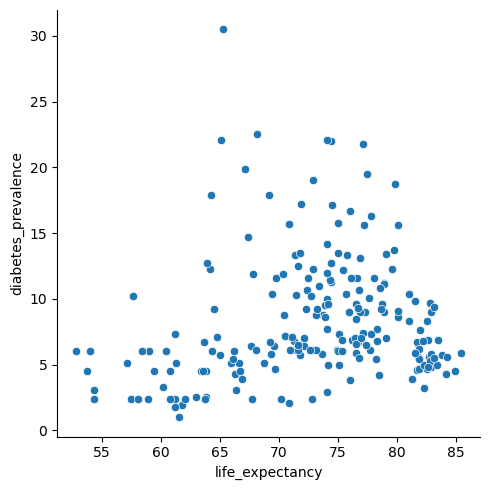

<Figure size 500x500 with 0 Axes>

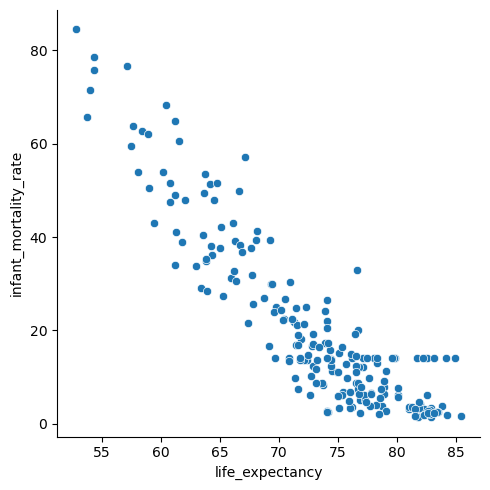

<Figure size 500x500 with 0 Axes>

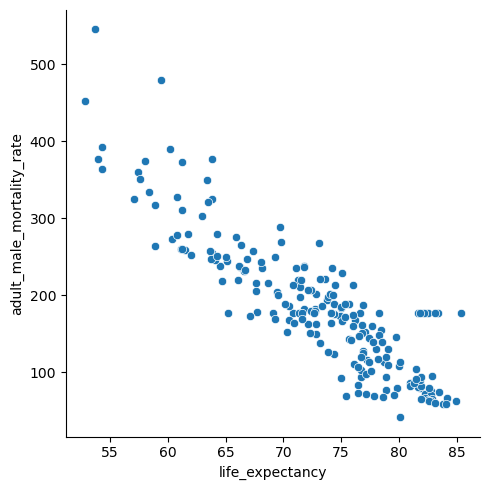

<Figure size 500x500 with 0 Axes>

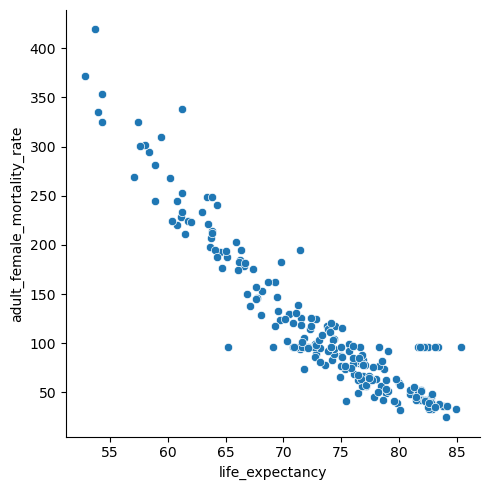

<Figure size 500x500 with 0 Axes>

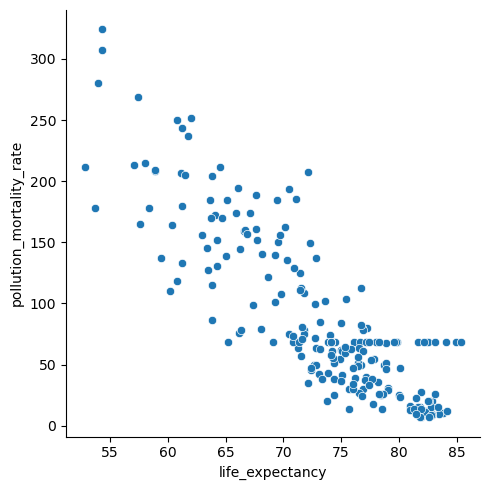

<Figure size 500x500 with 0 Axes>

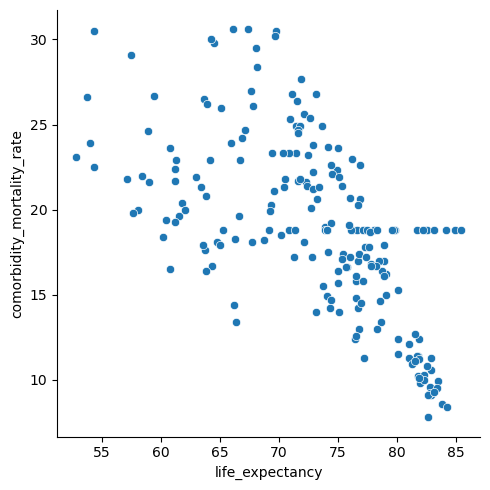

<Figure size 500x500 with 0 Axes>

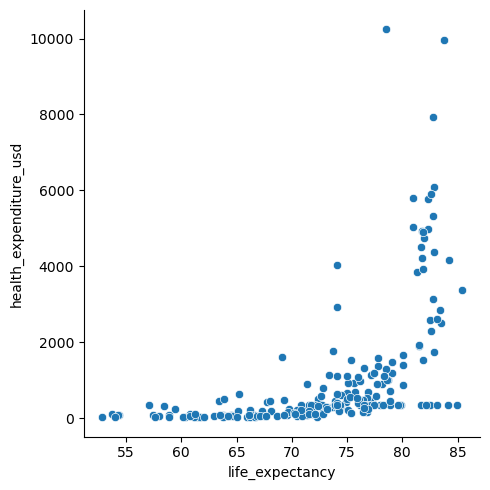

<Figure size 500x500 with 0 Axes>

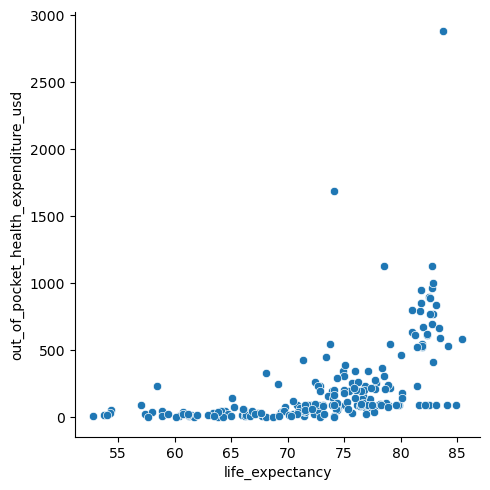

<Figure size 500x500 with 0 Axes>

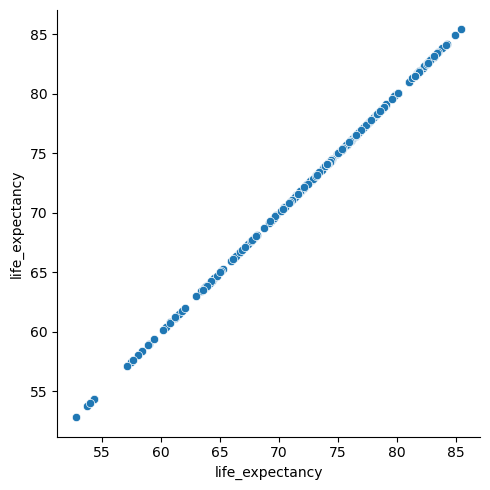

In [15]:
for col in data.columns:
    plt.figure(figsize=(5, 5))
    sns.relplot(data = data, y=data[col], x= data['life_expectancy'])
plt.show()

In [16]:
x = data.iloc[:,:-1]
y = data['life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#x_train_scaled = x_train
#x_test_scaled = x_test


-----------------------------------------
con n_estimators = 90
MAE en training: 1.05
MAE en testing: 1.22
MAD en training: 0.72
MAD en testing: 0.63
-----------------------------------------
con n_estimators = 110
MAE en training: 1.02
MAE en testing: 1.21
MAD en training: 0.71
MAD en testing: 0.60
-----------------------------------------
con n_estimators = 130
MAE en training: 1.01
MAE en testing: 1.19
MAD en training: 0.69
MAD en testing: 0.56
-----------------------------------------
con n_estimators = 150
MAE en training: 0.99
MAE en testing: 1.18
MAD en training: 0.67
MAD en testing: 0.54
-----------------------------------------
con n_estimators = 170
MAE en training: 0.98
MAE en testing: 1.18
MAD en training: 0.66
MAD en testing: 0.58
-----------------------------------------
con n_estimators = 190
MAE en training: 0.96
MAE en testing: 1.18
MAD en training: 0.65
MAD en testing: 0.60
-----------------------------------------
con n_estimators = 210
MAE en training: 0.95
MAE en t

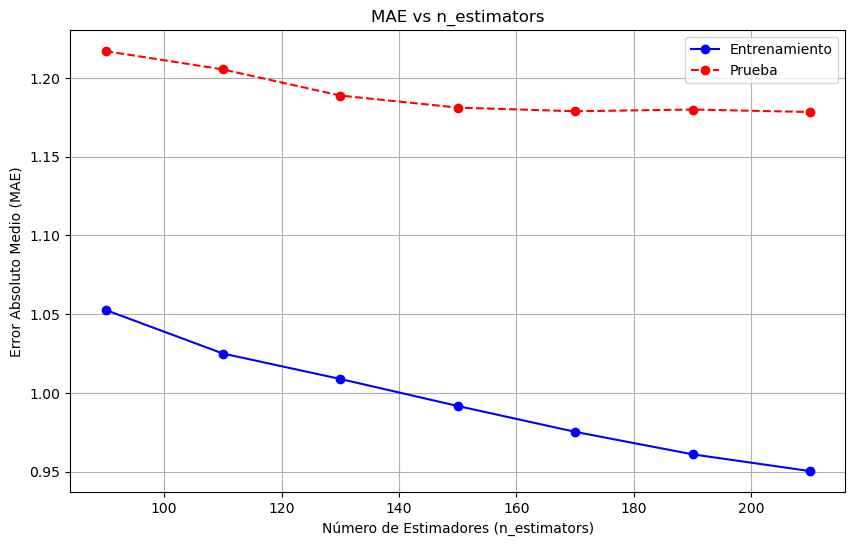

In [17]:



mae_train_GBR = []
mae_test_GBR = []

mad_train_GBR = []
mad_train_GBR = []

estimators = [90, 110, 130, 150, 170, 190, 210]

for estimador in estimators:
    #modelo
    reg = GradientBoostingRegressor(n_estimators = estimador, max_depth = 1, learning_rate = 0.12 )
    reg.fit(x_train_scaled, y_train)

    #predicción de resultados
    y_train_pred_GBR = reg.predict(x_train_scaled)
    y_test_pred_GBR = reg.predict(x_test_scaled)

    #Errores
    train_mad_GBR = median_absolute_error(y_train, y_train_pred_GBR)
    test_mad_GBR = median_absolute_error(y_test, y_test_pred_GBR)

    train_error_GBR = mean_absolute_error(y_train, y_train_pred_GBR)
    test_error_GBR = mean_absolute_error(y_test, y_test_pred_GBR)

    mae_train_GBR.append(train_error_GBR)
    mae_test_GBR.append(test_error_GBR)

    mad_train_GBR.append(train_mad_GBR)
    mad_train_GBR.append(test_mad_GBR)

    print("-----------------------------------------")
    print(f"con n_estimators = {estimador}")
    print(f"MAE en training: {train_error_GBR:.2f}")
    print(f"MAE en testing: {test_error_GBR:.2f}")

    print(f"MAD en training: {train_mad_GBR:.2f}")
    print(f"MAD en testing: {test_mad_GBR:.2f}")

#gráfica

plt.figure(figsize=(10, 6))
plt.plot(estimators, mae_train_GBR, marker='o', linestyle='-', color='blue', label='Entrenamiento')
plt.plot(estimators, mae_test_GBR, marker='o', linestyle='--', color='red', label='Prueba')
plt.title('MAE vs n_estimators')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Error Absoluto Medio (MAE)')
plt.legend()
plt.grid(True)
plt.show()


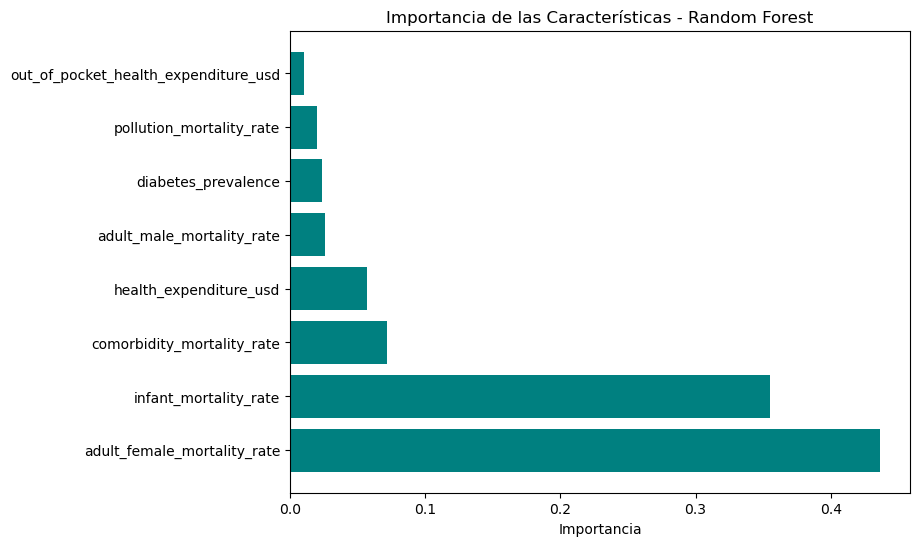

                                Feature  Importance
3           adult_female_mortality_rate    0.436750
1                 infant_mortality_rate    0.354803
5            comorbidity_mortality_rate    0.071408
6                health_expenditure_usd    0.057209
2             adult_male_mortality_rate    0.025962
0                   diabetes_prevalence    0.023396
4              pollution_mortality_rate    0.020333
7  out_of_pocket_health_expenditure_usd    0.010138


In [18]:
# -----------------------------------------------------
# Modelo 2: Random Forest - Importancia de los features
# -----------------------------------------------------

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)
rf_model.fit(x_train, y_train)

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar mejor
feature_names = x_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar por la importancia de las características
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importancia')
plt.title('Importancia de las Características - Random Forest')
plt.show()

# Mostrar las importancias
print(importance_df)

########################################
Error Absoluto Medio (MAE) con 40 iteraciones en training es de: 0.9009
Error Absoluto Medio (MAE) con 40 iteraciones en test es de: 1.3163
Median Absolute Deviation (MAD) con 40 iteraciones en training es de: 0.6010
Median Absolute Deviation (MAD) con 40 iteraciones en test es de: 0.6225
########################################
Error Absoluto Medio (MAE) con 60 iteraciones en training es de: 0.8865
Error Absoluto Medio (MAE) con 60 iteraciones en test es de: 1.2972
Median Absolute Deviation (MAD) con 60 iteraciones en training es de: 0.5648
Median Absolute Deviation (MAD) con 60 iteraciones en test es de: 0.6552
########################################
Error Absoluto Medio (MAE) con 80 iteraciones en training es de: 0.8800
Error Absoluto Medio (MAE) con 80 iteraciones en test es de: 1.2870
Median Absolute Deviation (MAD) con 80 iteraciones en training es de: 0.5733
Median Absolute Deviation (MAD) con 80 iteraciones en test es de: 0.6460
#######

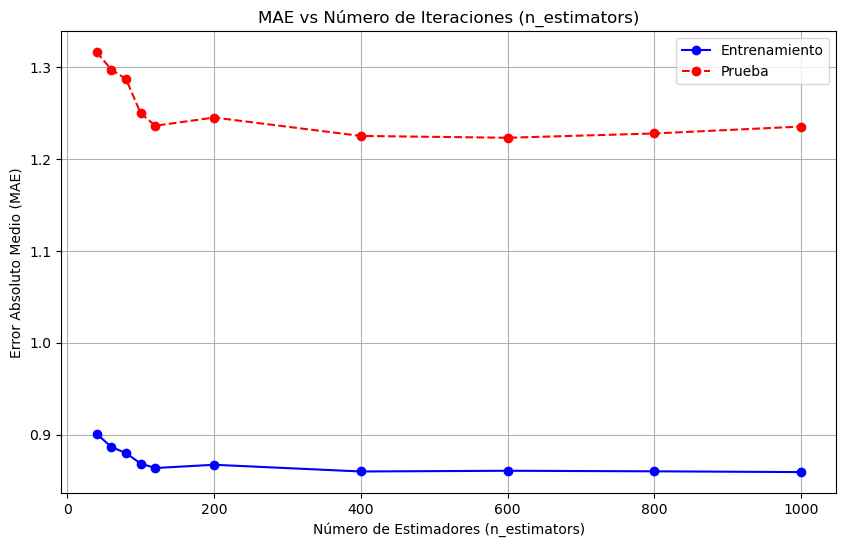

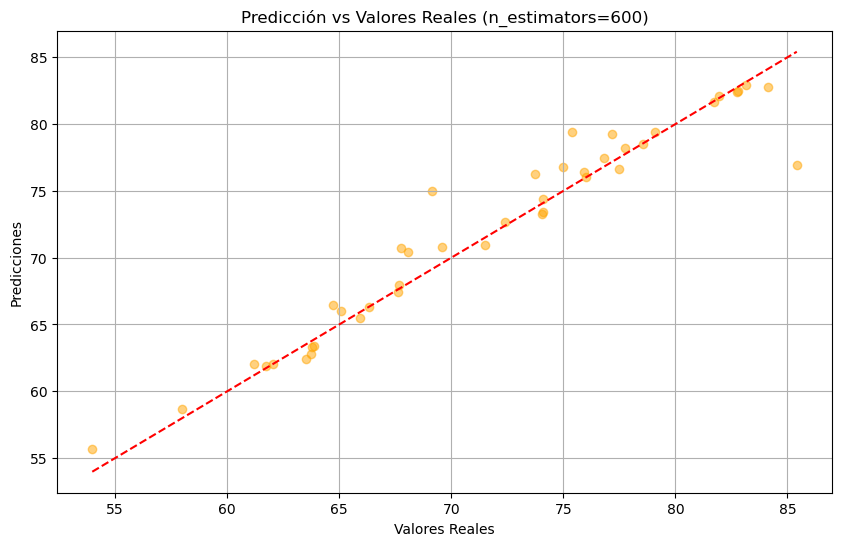

In [22]:
# -----------------------------------------------------
# Modelo 2: Random Forest
# -----------------------------------------------------

n_estimators = [40,60,80,100,120,200,400,600,800,1000]

# Listas para almacenar los resultados de MAE para entrenamiento y prueba
train_mae_values_rf = []
test_mae_values_rf = []

train_mad_values_rf = []
test_mad_values_rf = []

n_estimators_values = []

# 3. Loop sobre diferentes números de estimadores
for n_estimators in n_estimators:  # Probar con 10, 20, ..., 200 estimadores
    # Crear el modelo RandomForestRegressor
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42, max_features = 0.9, max_depth = 5)

    # Entrenar el modelo
    rf_model.fit(x_train, y_train)

    # Hacer predicciones sobre los conjuntos de entrenamiento y prueba
    y_train_pred = rf_model.predict(x_train)
    y_test_pred = rf_model.predict(x_test)

    # Calcular el MAE y almacenar los resultados
    train_mae_rf = mean_absolute_error(y_train, y_train_pred)
    test_mae_rf = mean_absolute_error(y_test, y_test_pred)

    train_mad_rf = median_absolute_error(y_train, y_train_pred)
    test_mad_rf = median_absolute_error(y_test, y_test_pred)

    train_mae_values_rf.append(train_mae_rf)
    test_mae_values_rf.append(test_mae_rf)
    n_estimators_values.append(n_estimators)

    train_mad_values_rf.append(train_mad_rf)
    test_mad_values_rf.append(test_mad_rf)

    print("########################################")
    print(f"Error Absoluto Medio (MAE) con {n_estimators} iteraciones en training es de: {train_mae_rf:.4f}")
    print(f"Error Absoluto Medio (MAE) con {n_estimators} iteraciones en test es de: {test_mae_rf:.4f}")

    print(f"Median Absolute Deviation (MAD) con {n_estimators} iteraciones en training es de: {train_mad_rf:.4f}")
    print(f"Median Absolute Deviation (MAD) con {n_estimators} iteraciones en test es de: {test_mad_rf:.4f}")

# 4. Graficar MAE vs Iteraciones (n_estimators) para entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_mae_values_rf, marker='o', linestyle='-', color='blue', label='Entrenamiento')
plt.plot(n_estimators_values, test_mae_values_rf, marker='o', linestyle='--', color='red', label='Prueba')
plt.title('MAE vs Número de Iteraciones (n_estimators)')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Error Absoluto Medio (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# 5. Entrenar el modelo con el número óptimo de estimadores (supongamos que elegimos el valor máximo de n_estimators)
optimal_n_estimators = n_estimators_values[np.argmin(test_mae_values_rf)]
rf_model_optimal = RandomForestRegressor(n_estimators=optimal_n_estimators, random_state=42)
rf_model_optimal.fit(x_train, y_train)

# 6. Hacer predicciones para los valores reales
y_pred_optimal = rf_model_optimal.predict(x_test)

# 7. Graficar Predicción vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimal, alpha=0.5, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.title(f'Predicción vs Valores Reales (n_estimators={optimal_n_estimators})')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

---------------------------------------------------------
grado 1. MAE training 1.3629120646560655
grado 1. MAE testing 1.4537418555115966
grado 1. MAD training 0.9238986307143264
grado 1. MAD testing 0.9839481008158479
---------------------------------------------------------
grado 2. MAE training 1.160016821107785
grado 2. MAE testing 1.7946672708333335
grado 2. MAD training 0.8277343750000057
grado 2. MAD testing 1.1018593749999965
---------------------------------------------------------
grado 3. MAE training 0.05859136632217343
grado 3. MAE testing 108.58987848175431
grado 3. MAD training 1.4949819160392508e-11
grado 3. MAD testing 39.51591757041381


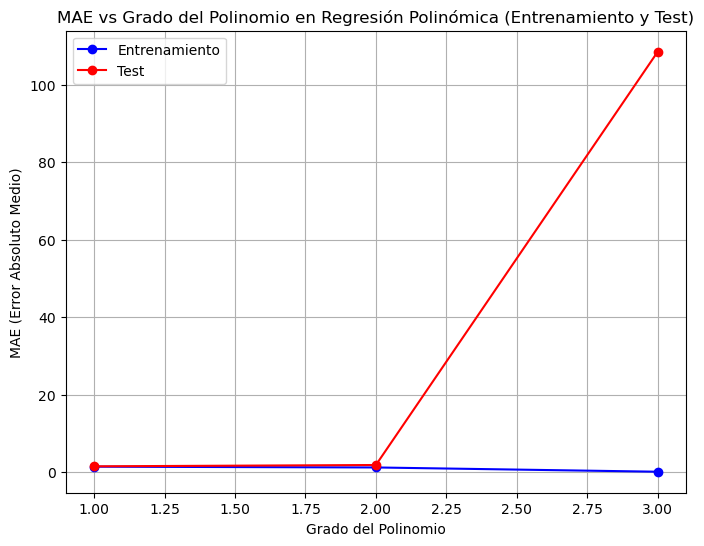

In [20]:
degrees = 4

# Contenedores para MAE de cada grado (entrenamiento y test)
mae_train_values_poly = []
mae_test_values_poly = []

mad_train_values_poly = []
mad_test_values_poly = []

# Probar polinomios de grado 1 a 15
for degree in range(1, degrees):
    # Crear características polinómicas
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(x_train_scaled)
    X_test_poly = poly.transform(x_test_scaled)
    
    # Ajustar el modelo de regresión lineal a los datos de entrenamiento
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predecir los valores con el modelo ajustado para entrenamiento y test
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calcular el MAE (Error Absoluto Medio) para entrenamiento y test
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    mad_train = median_absolute_error(y_train, y_train_pred)
    mad_test = median_absolute_error(y_test, y_test_pred)
    
    mae_train_values_poly.append(mae_train)
    mae_test_values_poly.append(mae_test)

    mad_train_values_poly.append(mad_train)
    mad_test_values_poly.append(mad_test)
    
    print("---------------------------------------------------------")
    print(f"grado {degree}. MAE training {mae_train }")
    print(f"grado {degree}. MAE testing {mae_test }")
    print(f"grado {degree}. MAD training {mad_train }")
    print(f"grado {degree}. MAD testing {mad_test }")

# Graficar MAE (train y test) en función del grado del polinomio
plt.figure(figsize=(8, 6))
plt.plot(range(1, degrees), mae_train_values_poly, marker='o', linestyle='-', color='b', label='Entrenamiento')
plt.plot(range(1, degrees), mae_test_values_poly, marker='o', linestyle='-', color='r', label='Test')
plt.title('MAE vs Grado del Polinomio en Regresión Polinómica (Entrenamiento y Test)')
plt.xlabel('Grado del Polinomio')
plt.ylabel('MAE (Error Absoluto Medio)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth = 4)

    # Entrenar el modelo
dt_model.fit(x_train, y_train)

    # Hacer predicciones sobre los conjuntos de entrenamiento y prueba
y_train_pred_dt = dt_model.predict(x_train)
y_test_pred_dt = dt_model.predict(x_test)

    # Calcular el MAE y almacenar los resultados
train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)

print(train_mae_dt)
print(test_mae_dt)

--------------------------------------------------------------------
El MAE en training con C = 0.02 es: 1.50
El MAE en testing con C = 0.02 es: 1.43
El MAD en training con C = 0.02 es: 1.29
El MAD en testing con C = 0.02 es: 1.22
--------------------------------------------------------------------
El MAE en training con C = 0.022 es: 1.48
El MAE en testing con C = 0.022 es: 1.40
El MAD en training con C = 0.022 es: 1.20
El MAD en testing con C = 0.022 es: 1.15
--------------------------------------------------------------------
El MAE en training con C = 0.024 es: 1.46
El MAE en testing con C = 0.024 es: 1.38
El MAD en training con C = 0.024 es: 1.13
El MAD en testing con C = 0.024 es: 1.07
--------------------------------------------------------------------
El MAE en training con C = 0.026 es: 1.46
El MAE en testing con C = 0.026 es: 1.37
El MAD en training con C = 0.026 es: 1.09
El MAD en testing con C = 0.026 es: 1.02
----------------------------------------------------------------

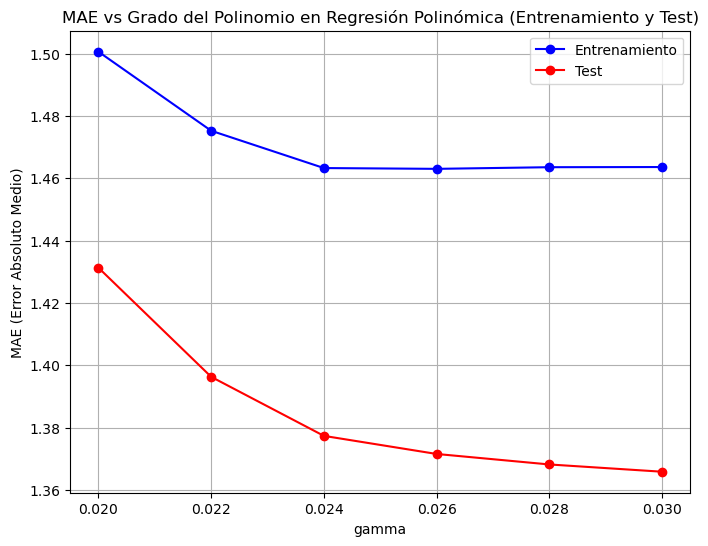

In [24]:
# -----------------------------------------------------
# Modelo 2: Suport Vector Regression
# -----------------------------------------------------

#Valores para el hiperparámetro C
Cs = [50,60,70,80,90,100,110,120,130]
gamma = [0.02,0.022,0.024,0.026,0.028,0.03]
train_mae_svm = []
test_mae_svm = []

train_mad_svm = []
test_mad_svm = []

for element in gamma:
    #Creación del modelo
    regr = svm.SVR(C = 80, kernel = "rbf", epsilon= 2.9, gamma = element)
    regr.fit(x_train_scaled, y_train)

    #predicción de resultados
    y_train_pred_svm = regr.predict(x_train_scaled)
    y_test_pred_svm = regr.predict(x_test_scaled)

    #error
    train_error = mean_absolute_error(y_train, y_train_pred_svm)
    test_error = mean_absolute_error(y_test, y_test_pred_svm)

    train_error_mad = median_absolute_error(y_train, y_train_pred_svm)
    test_error_mad = median_absolute_error(y_test, y_test_pred_svm)

    train_mae_svm.append(train_error)
    test_mae_svm.append(test_error)

    train_mad_svm.append(train_error_mad)
    test_mad_svm.append(test_error_mad)

    print("--------------------------------------------------------------------")
    print(f"El MAE en training con C = {element} es: {train_error:.2f}")
    print(f"El MAE en testing con C = {element} es: {test_error:.2f}")
    print(f"El MAD en training con C = {element} es: {train_error_mad:.2f}")
    print(f"El MAD en testing con C = {element} es: {test_error_mad:.2f}")


# Graficar MAE (train y test) en función del grado del polinomio
plt.figure(figsize=(8, 6))
plt.plot(gamma, train_mae_svm, marker='o', linestyle='-', color='b', label='Entrenamiento')
plt.plot(gamma, test_mae_svm, marker='o', linestyle='-', color='r', label='Test')
plt.title('MAE vs Grado del Polinomio en Regresión Polinómica (Entrenamiento y Test)')
plt.xlabel('gamma')
plt.ylabel('MAE (Error Absoluto Medio)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(5, 5))
sns.relplot(data = data, y=data["infant_mortality_rate"], x= data['health_expenditure_usd'])
plt.show()

In [ ]:
#Comparación del MAE para los distintos modelos 
#(se toman los errores más bajos conseguidos con cada modelo)

#error en Gradient Boosting Regressor
min_mae_train_GBR = 0.99
min_mae_test_GBR = 1.18

#error en Random Forest
min_mae_train_RF = 0.86
min_mae_test_RF = 1.22

#error en regresión polinomial
min_mae_train_poly = 1.36
min_mae_test_poly = 1.45

#error en Support Vector Regression
min_mae_train_SVR = 1.46
min_mae_test_SVR = 1.37

metricas = [min_mae_train_GBR ,min_mae_test_GBR, 
            min_mae_train_RF, min_mae_test_RF, 
            min_mae_train_poly, min_mae_test_poly,
           min_mae_train_SVR, min_mae_test_SVR]
nombres_metricas = ['Train Gradient Boosting', 'Test Gradient Boosting', 'Train Random Forest', 'Test Random Forest', 
                    'Train Polynomial', 'Test Polynomial', "Train SVR", "Test SVR"]


plt.figure(figsize = (20,5))
plt.bar(nombres_metricas, metricas, color=['blue','blue', 'green','green', 'red','red', "orange", "orange"])
plt.title("Comparación de Error Absoluto Medio (MAE) del Modelo")
plt.ylabel("Valor de la Métrica")
plt.grid()
plt.show()

De esta gráfica se puede observar fácilmente que el modelo generado con Gradient Boosting Regressor, es el que mejor resultados otorga. Dando un valor bastante bajo de sobreajuste y ofreciendo el menor MAE en pruebas. 
Un error promedio de 1.18 años donde la esperanza de vida promedio es de 72.8 años, corresponde a una diferencia del 1.6 %, que es un resultado bastante bajo y apropiado para la esperanza de vida.


De estos algoritmos el más comprensible es el de regresión polinomial, siendo también el que peores resultados dio en el testing. Esto se puede deber a que la regresión lineal ajusta los datos a algún grado polinómico, y como se puede observar en los gráficos de dispersión, algunas de las carácterísticas más importantes, o influyentes, muestran una tendencia bastante lineal con respecto a la variable objetivo (la esperanza de vida); sin embargo, hay otras características que muestran otra tendencia diferente a la lineal. De esta forma, si se trabaja con un grado uno no se ajusta muy bien a esos datos que no tienen una tendiencia lineal; si por el contrario se cambia el grado del polinomio, se pierde la relación lineal de estas variables importantes.

El algoritmo que mostró mejor rendimiento es Gradient Boosting Regressor, que a pesar de ser un algoritmo bastante eficiente en muchos casos, tiene la desventaja de ser poco interpretable. Seguido por Random Forest, otro algoritmo basado en árboles de decisión; y por último la regresión lineal y Support Vector Regression. Los algoritmos basados en árboles de decisión suelen ser óptimos para capturar relaciones complejas entre variables, por lo que es posible que existan relaciones complejas entre variables que la regresión lineal y SVR no sean capaces de describir.


De los datos se puede observar que existe una tendencia aparentemente lineal en las características que tienen más peso, como la tasa de mortalidad tanto en niños como en adultos, en donde menor sea la tasa de mortalidad, mayor es la esperanza de vida. En el gasto en salud, se observa una tendencia aparentemente exponencial, en donde a mayor gasto, mayor esperanza de vida. La mortalidad por contaminación aparenta una relación lineal con la esperanza de vida, donde a mayor mortalidad, menor esperanza de vida. La prevalencia en diabetes no muestra ninguna aparente tendencia; de igual forma la mortalidad por comorbilildad no muestra una tendencia clara (se puede pensar en una relación lineal con la esperanza de vida, pero esta se muestra muy dispersa). Sucede algo similar con la relación entre el gasto en salud fuera de presupuesto y la esperanza de vida: no se aprecia una tendencia clara.

A través de la experimentación, se logró detectar algunas variables con poca incidencia en la expectativa de vida, como lo es la prevalencia en el fumado, la cantidad de doctores y enfermeros por mil habitantes.

El modelo que mejor generaliza las características con la esperanza de vida, es el Gradient Boosting Regressor. Se reporta un Mean Absolute Error en training de 0.99 años y en testing de 1.18 años; además de un Median Absolute Error en training de 0.67 años y en testing 0.54 años.

A través del análisis de los datos y la experimentación con los modelos, se llega a la conclusión de que las caracteríscas más influyentes en la esperanza de vida son las tasas de mortalidad infantil y en personas adultas, mientras que hay otras que no son influyentes de manera significativa. 